# Weather Prediction Model
- Edwin Peraza
- Max Lebda
- Cade Duncan

## Setup
This setup is based on the book

In [187]:
import matplotlib.pyplot as plt
from pathlib import Path

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

IMAGES_PATH = Path("..") / "reports" / "figures"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Define the save_fig function
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    print(f"Saving figure to {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Importing the Data
We are importing a dataset from Redivis. For local use it might request authentication with Redivis.

In [188]:
import redivis
import pandas as pd
import matplotlib.pyplot as plt

user = redivis.user("cdpdemo")
dataset = user.dataset("climate_change_earth_surface_temperature_data:1e0a:v1_0")
table = dataset.table("global_temperatures_by_major_city:7x6x")

# Load table as a dataframe
df = table.to_pandas_dataframe()
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1926-10-01,21.425,0.437,Cali,Colombia,4.02N,76.34W
1,1967-03-01,22.05,0.343,Cali,Colombia,4.02N,76.34W
2,1910-06-01,21.577,0.461,Cali,Colombia,4.02N,76.34W
3,1913-05-01,21.109,0.502,Cali,Colombia,4.02N,76.34W
4,1888-10-01,21.432,1.062,Cali,Colombia,4.02N,76.34W


## Visualising the Data

### Visualizing the Change in Temperature Around the World
From the same dataset we import the table with information of temperatures of the world

In [163]:
table_global = dataset.table("global_temperatures:5yc3")

global_df = table_global.to_pandas_dataframe()
global_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1802-05-01,10.457,1.82,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1785-12-01,1.873,1.909,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1840-11-01,4.101,0.982,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1825-01-01,3.213,1.913,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1816-06-01,11.79,1.087,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [164]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype               
---  ------                                     --------------  -----               
 0   dt                                         3192 non-null   date32[day][pyarrow]
 1   LandAverageTemperature                     3180 non-null   double[pyarrow]     
 2   LandAverageTemperatureUncertainty          3180 non-null   double[pyarrow]     
 3   LandMaxTemperature                         1992 non-null   double[pyarrow]     
 4   LandMaxTemperatureUncertainty              1992 non-null   double[pyarrow]     
 5   LandMinTemperature                         1992 non-null   double[pyarrow]     
 6   LandMinTemperatureUncertainty              1992 non-null   double[pyarrow]     
 7   LandAndOceanAverageTemperature             1992 non-null   double[pyarrow]     
 8   LandAndOceanAverageTemperatureUncertain

Saving figure to ../reports/figures/Land_and_Ocean_Average_Temperature_Over_Time.png


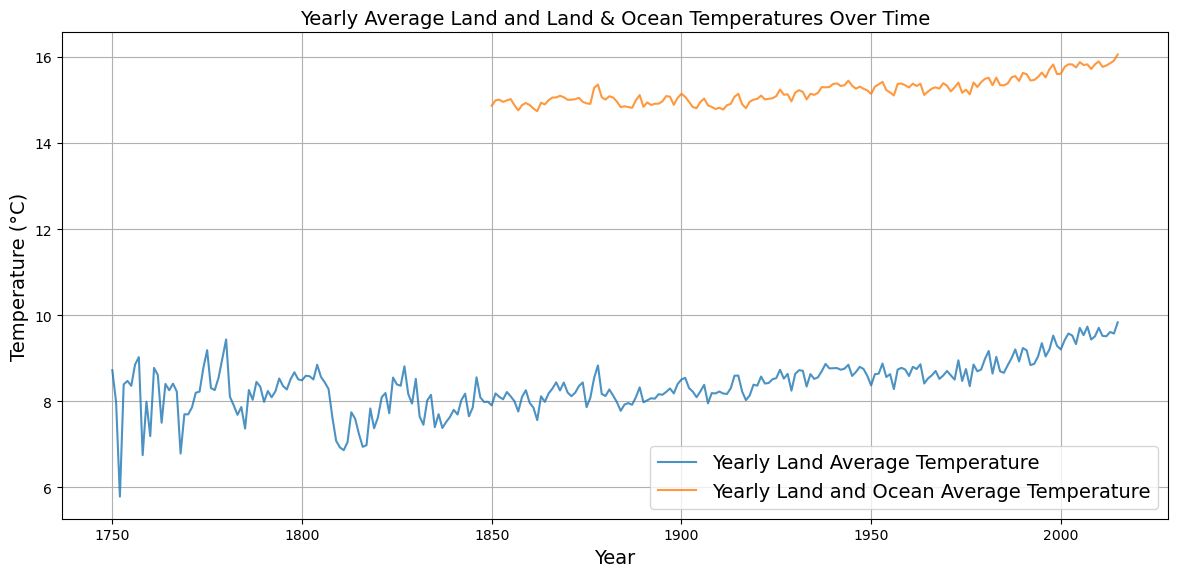

In [182]:
global_df['dt'] = pd.to_datetime(global_df['dt'])
# Extract the year from the date and add it as a new column
global_df['year'] = global_df['dt'].dt.year

# Group by year and calculate the mean temperature for each year
yearly_avg_temp = global_df.groupby('year')[['LandAverageTemperature', 'LandAndOceanAverageTemperature']].mean().reset_index()

# Plotting the yearly averaged Land and Land & Ocean Temperatures
plt.figure(figsize=(12, 6))

# Plot Land Average Temperature
plt.plot(yearly_avg_temp['year'], yearly_avg_temp['LandAverageTemperature'], label='Yearly Land Average Temperature', alpha=0.8)

# Plot Land and Ocean Average Temperature
plt.plot(yearly_avg_temp['year'], yearly_avg_temp['LandAndOceanAverageTemperature'], label='Yearly Land and Ocean Average Temperature', alpha=0.8)

# Adding titles and labels
plt.title('Yearly Average Land and Land & Ocean Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Show the plot
save_fig("Land_and_Ocean_Average_Temperature_Over_Time")
plt.show()

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype               
---  ------                         --------------   -----               
 0   dt                             239177 non-null  date32[day][pyarrow]
 1   AverageTemperature             228175 non-null  double[pyarrow]     
 2   AverageTemperatureUncertainty  228175 non-null  double[pyarrow]     
 3   City                           239177 non-null  string[pyarrow]     
 4   Country                        239177 non-null  string[pyarrow]     
 5   Latitude                       239177 non-null  string[pyarrow]     
 6   Longitude                      239177 non-null  string[pyarrow]     
dtypes: date32[day][pyarrow](1), double[pyarrow](2), string[pyarrow](4)
memory usage: 14.2 MB


In [190]:
df.shape

(239177, 7)

In [191]:
df.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,239177,228175.0,228175.0
mean,1910-11-09,18.125969,0.969343
min,1743-11-01,-26.772,0.04
25%,1864-02-01,12.71,0.34
50%,1914-02-01,20.428,0.592
75%,1963-12-01,25.918,1.32
max,2013-09-01,38.283,14.037
std,NaN,10.0248,0.979644


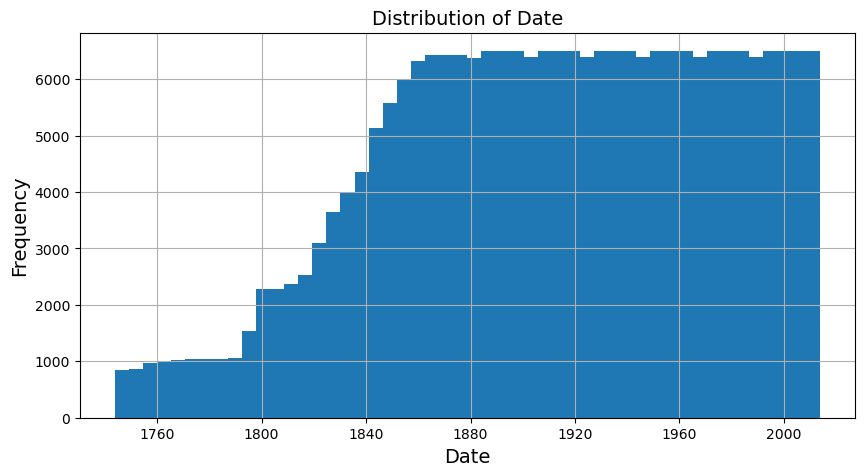

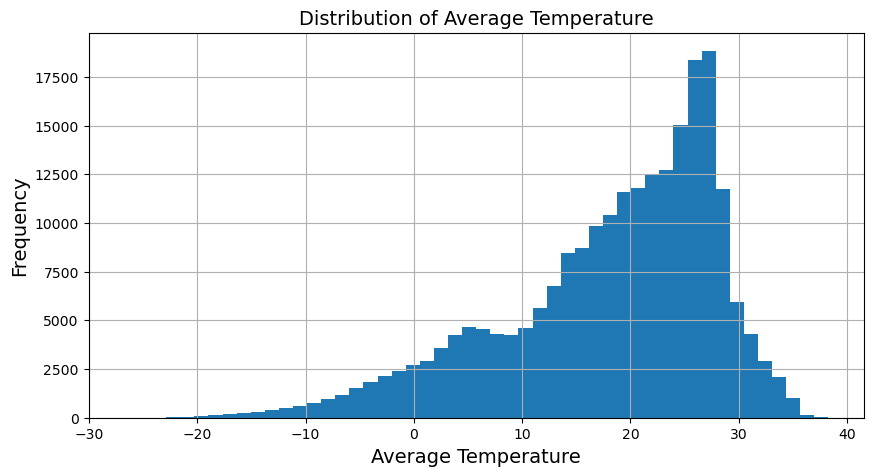

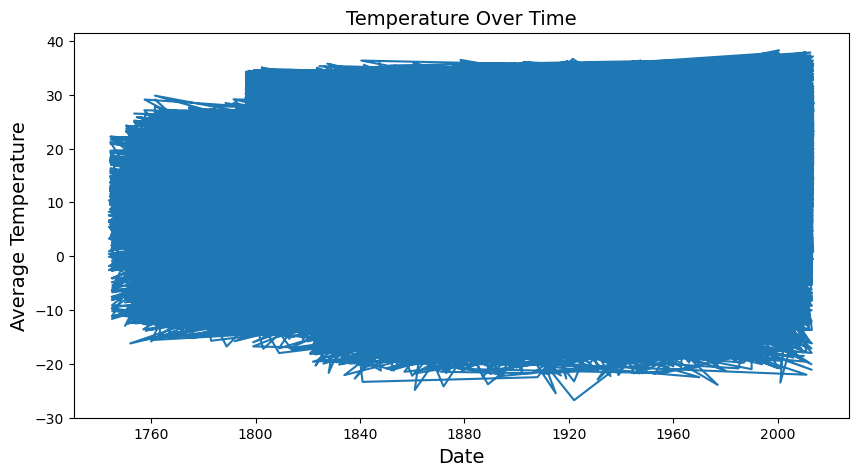

In [192]:
df['dt'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Date')
plt.show()

df['AverageTemperature'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature')
plt.show()

# Time series visualization for temperatures over time
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['dt']), df['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Temperature Over Time')
plt.show()

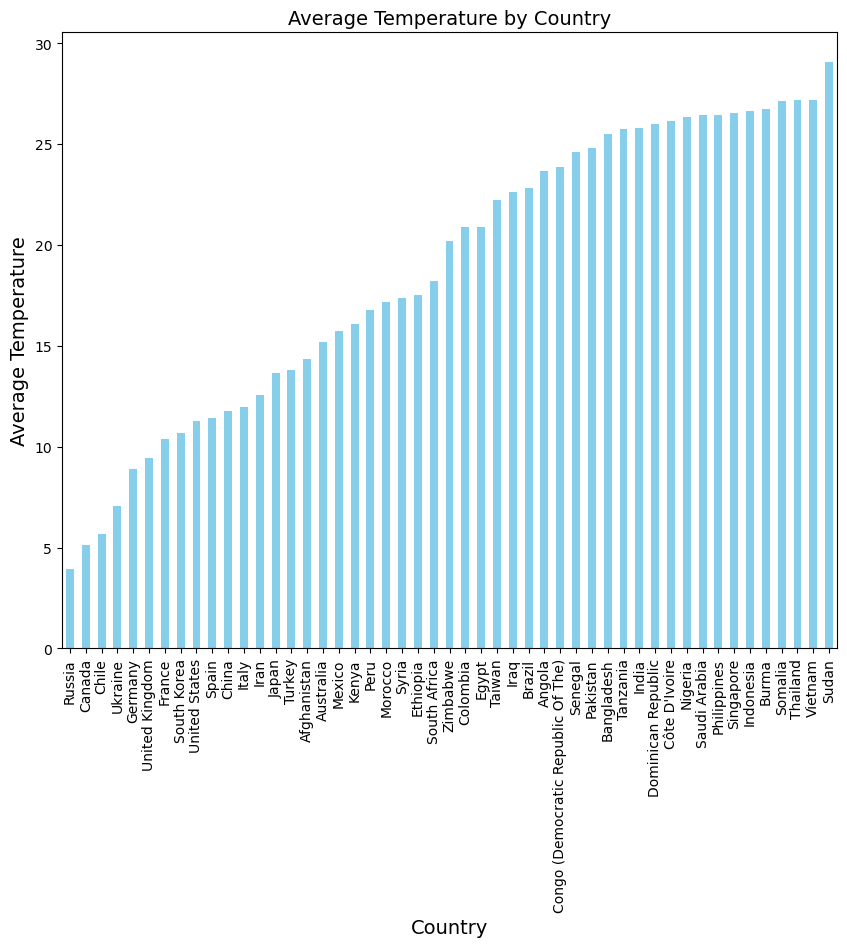

In [193]:
# Group data by country and calculate the mean temperature
country_temp = df.groupby('Country')['AverageTemperature'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 8))
country_temp.plot(kind='bar', color='skyblue')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Country')
plt.xticks(rotation=90)
plt.show()

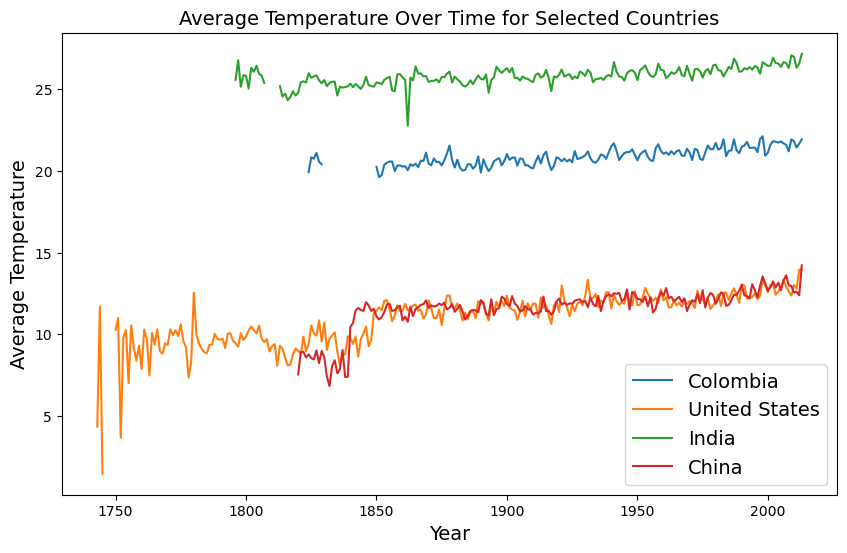

In [194]:
# Select a few countries to compare
selected_countries = ['Colombia', 'United States', 'India', 'China']  # Adjust with the countries you are interested in
df['dt'] = pd.to_datetime(df['dt'])  # Convert dt to datetime format
df['Year'] = df['dt'].dt.year  # Extract the year
df['Month'] = df['dt'].dt.month # Extract the Month
df['Day'] = df['dt'].dt.day  # Extract the day

plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = df[df['Country'] == country].groupby('Year')['AverageTemperature'].mean()
    plt.plot(country_data.index, country_data.values, label=country)

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time for Selected Countries')
plt.legend()
plt.show()

Saving figure to ../reports/figures/Average_Temperature_Uncertainty_Over_Years.png


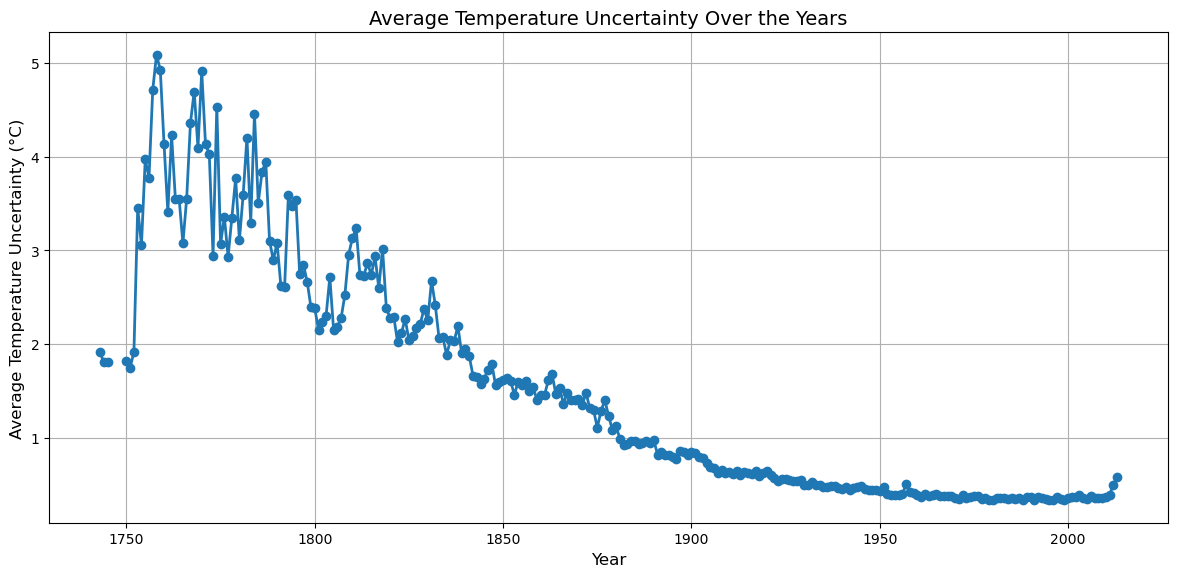

In [196]:
# Group by year and calculate the mean of AverageTemperatureUncertainty
yearly_uncertainty = df.groupby('Year')['AverageTemperatureUncertainty'].mean()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(yearly_uncertainty.index, yearly_uncertainty.values, marker='o', linestyle='-', linewidth=2)
plt.title("Average Temperature Uncertainty Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature Uncertainty (°C)", fontsize=12)
plt.grid(True)
plt.tight_layout()
save_fig("Average_Temperature_Uncertainty_Over_Years")
plt.show()

## Data Preprocessing
Now we are working back with our main dataset that we are going to be using for the prediction model

In [197]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day
0,1926-10-01,21.425,0.437,Cali,Colombia,4.02N,76.34W,1926,10,1
1,1967-03-01,22.05,0.343,Cali,Colombia,4.02N,76.34W,1967,3,1
2,1910-06-01,21.577,0.461,Cali,Colombia,4.02N,76.34W,1910,6,1
3,1913-05-01,21.109,0.502,Cali,Colombia,4.02N,76.34W,1913,5,1
4,1888-10-01,21.432,1.062,Cali,Colombia,4.02N,76.34W,1888,10,1


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   dt                             239177 non-null  datetime64[ns] 
 1   AverageTemperature             228175 non-null  double[pyarrow]
 2   AverageTemperatureUncertainty  228175 non-null  double[pyarrow]
 3   City                           239177 non-null  string[pyarrow]
 4   Country                        239177 non-null  string[pyarrow]
 5   Latitude                       239177 non-null  string[pyarrow]
 6   Longitude                      239177 non-null  string[pyarrow]
 7   Year                           239177 non-null  int32          
 8   Month                          239177 non-null  int32          
 9   Day                            239177 non-null  int32          
dtypes: datetime64[ns](1), double[pyarrow](2), int32(3), stri

## Filtering Data Before 1870
We chose to remove rows where the `Year` is earlier than 1870. The reasoning behind this decision is:

1. **Data Quality**: Data from earlier years contains many missing or incomplete values, which could reduce the reliability of our model.
2. **Sufficient Data**: Even after removing rows before 1870, the dataset retains plenty of observations to train our model effectively.
3. **Focus on Modern Trends**: By excluding older data, we align our analysis with more recent climate trends, which are likely more relevant and better recorded.

This step ensures that our dataset is both clean and representative of reliable climate records, improving the overall quality of the analysis.

In [199]:
# Number of rows before filtering
initial_rows = len(df)

# Remove rows where the year is before 1870
df = df[df['Year'] >= 1870]

# Count rows removed due to the year filter
rows_removed_year = initial_rows - len(df)

# Remove rows with missing values
df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Count rows removed due to missing values
rows_removed_na = initial_rows - rows_removed_year - len(df)

# Total rows removed
total_removed = rows_removed_year + rows_removed_na

# Print information about removed rows
print(f"Number of rows removed (Year < 1870): {rows_removed_year}")
print(f"Number of rows removed (Missing temperature data): {rows_removed_na}")
print(f"Total number of rows removed: {total_removed}")
print(f"Number of rows remaining: {len(df)}")

# Display the first few rows of the cleaned dataframe
df.info()

Number of rows removed (Year < 1870): 66811
Number of rows removed (Missing temperature data): 1241
Total number of rows removed: 68052
Number of rows remaining: 171125
<class 'pandas.core.frame.DataFrame'>
Index: 171125 entries, 0 to 228173
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   dt                             171125 non-null  datetime64[ns] 
 1   AverageTemperature             171125 non-null  double[pyarrow]
 2   AverageTemperatureUncertainty  171125 non-null  double[pyarrow]
 3   City                           171125 non-null  string[pyarrow]
 4   Country                        171125 non-null  string[pyarrow]
 5   Latitude                       171125 non-null  string[pyarrow]
 6   Longitude                      171125 non-null  string[pyarrow]
 7   Year                           171125 non-null  int32          
 8   Month                         

In [200]:
df.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty,Year,Month,Day
count,171125,171125.0,171125.0,171125.000000,171125.000000,171125.0
mean,1942-04-14 09:55:31.354273280,18.870181,0.574956,1941.827226,6.491226,1.0
min,1870-01-01 00:00:00,-26.772,0.04,1870.000000,1.000000,1.0
25%,1906-09-01 00:00:00,13.958,0.297,1906.000000,3.000000,1.0
50%,1942-05-01 00:00:00,21.21,0.441,1942.000000,6.000000,1.0
75%,1978-01-01 00:00:00,26.238,0.713,1978.000000,9.000000,1.0
max,2013-09-01 00:00:00,38.283,4.998,2013.000000,12.000000,1.0
std,NaN,9.700779,0.417209,41.237217,3.450092,0.0


In [201]:
df.shape

(171125, 10)

### Finding Correlation

In [202]:
# Function to convert latitude and longitude into numeric
def convert_lat_lon(value):
    if value[-1] in ['N', 'E']:
        return float(value[:-1])  # North and East are positive
    else:
        return -float(value[:-1])  # South and West are negative

# Apply the function to Latitude and Longitude columns, only if needed
if df['Latitude'].dtype != 'float64' and df['Latitude'].dtype != 'int64':
    df['Latitude'] = df['Latitude'].apply(convert_lat_lon)
if df['Longitude'].dtype != 'float64' and df['Longitude'].dtype != 'int64':
    df['Longitude'] = df['Longitude'].apply(convert_lat_lon)
    
# Count how many are NaN (not a number) after conversion
latitude_nan_count = df['Latitude'].isna().sum()
longitude_nan_count = df['Longitude'].isna().sum()

# Count how many rows are NaN
average_nan_count = df['AverageTemperature'].isna().sum()
averageUncertainty_nan_count = df['AverageTemperature'].isna().sum()

# Print the counts of invalid rows
print(f"Number of invalid (NaN) Latitude values: {latitude_nan_count}")
print(f"Number of invalid (NaN) Longitude values: {longitude_nan_count}")
print(f"Number of invalid (NaN) Average Temperature values: {average_nan_count}")
print(f"Number of invalid (NaN) Average Temperature values: {averageUncertainty_nan_count}")

# Keep only the numeric columns
correlation_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

correlation_matrix = correlation_df.corr(method="pearson")

# Display the correlation matrix
print(correlation_matrix)

Number of invalid (NaN) Latitude values: 0
Number of invalid (NaN) Longitude values: 0
Number of invalid (NaN) Average Temperature values: 0
Number of invalid (NaN) Average Temperature values: 0
                               AverageTemperature  \
AverageTemperature                       1.000000   
AverageTemperatureUncertainty           -0.036013   
Latitude                                -0.349575   
Longitude                                0.036157   
Year                                     0.042690   
Month                                    0.096640   
Day                                           NaN   

                               AverageTemperatureUncertainty  Latitude  \
AverageTemperature                                 -0.036013 -0.349575   
AverageTemperatureUncertainty                       1.000000 -0.099723   
Latitude                                           -0.099723  1.000000   
Longitude                                          -0.025464  0.168608   
Year      

### Encoding Categorical Variables: Country
To prepare the dataset for machine learning, we need to encode categorical variables into a numerical format. For this dataset, the `Country` column contains categorical values representing different countries. Since machine learning models typically work with numerical data, we will use **one-hot encoding** to transform this variable.

In [203]:
initial_columns = df.shape[1]

# Perform one-hot encoding for the 'Country' column in place
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Calculate the number of new columns added
new_columns_added = df.shape[1] - initial_columns

# Print the number of new columns added
print(f"Number of new columns created for 'Country': {new_columns_added}")

df.info()

Number of new columns created for 'Country': 47
<class 'pandas.core.frame.DataFrame'>
Index: 171125 entries, 0 to 228173
Data columns (total 57 columns):
 #   Column                                      Non-Null Count   Dtype          
---  ------                                      --------------   -----          
 0   dt                                          171125 non-null  datetime64[ns] 
 1   AverageTemperature                          171125 non-null  double[pyarrow]
 2   AverageTemperatureUncertainty               171125 non-null  double[pyarrow]
 3   City                                        171125 non-null  string[pyarrow]
 4   Latitude                                    171125 non-null  float64        
 5   Longitude                                   171125 non-null  float64        
 6   Year                                        171125 non-null  int32          
 7   Month                                       171125 non-null  int32          
 8   Day                  

In [204]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude,Year,Month,Day,Country_Angola,...,Country_Syria,Country_Taiwan,Country_Tanzania,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Vietnam,Country_Zimbabwe
0,1926-10-01,21.425,0.437,Cali,4.02,-76.34,1926,10,1,False,...,False,False,False,False,False,False,False,False,False,False
1,1967-03-01,22.05,0.343,Cali,4.02,-76.34,1967,3,1,False,...,False,False,False,False,False,False,False,False,False,False
2,1910-06-01,21.577,0.461,Cali,4.02,-76.34,1910,6,1,False,...,False,False,False,False,False,False,False,False,False,False
3,1913-05-01,21.109,0.502,Cali,4.02,-76.34,1913,5,1,False,...,False,False,False,False,False,False,False,False,False,False
4,1888-10-01,21.432,1.062,Cali,4.02,-76.34,1888,10,1,False,...,False,False,False,False,False,False,False,False,False,False


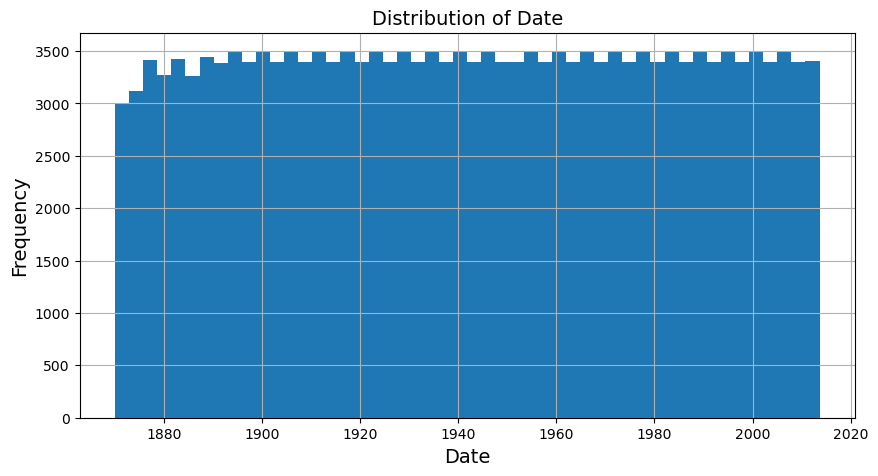

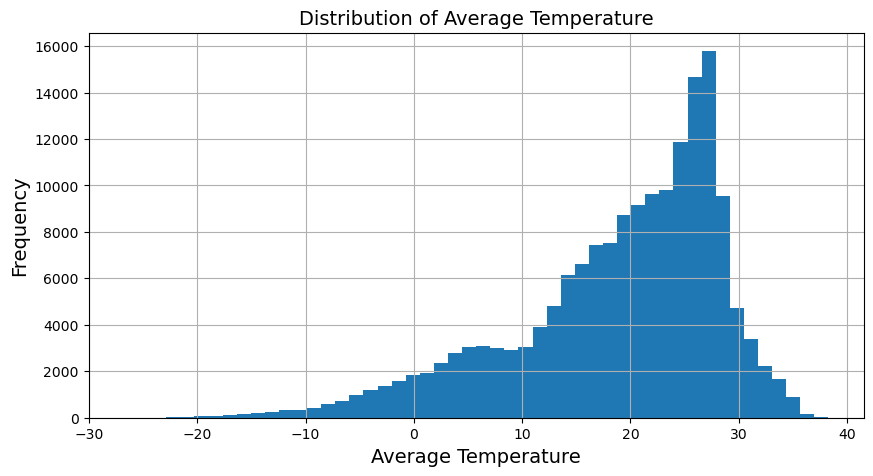

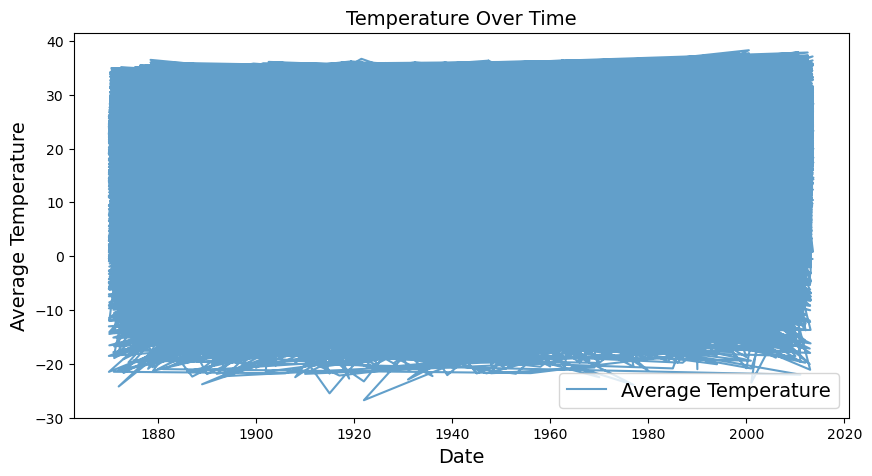

In [205]:
# Histogram for the distribution of dates
df['dt'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Date')
plt.show()

# Histogram for the distribution of Average Temperature
df['AverageTemperature'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature')
plt.show()

# Time series visualization for Average Temperature over time
plt.figure(figsize=(10, 5))
plt.plot(df['dt'], df['AverageTemperature'], alpha=0.7, label='Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

In [206]:
# Drop the 'City' and 'dt' columns only if they exist
columns_to_drop = ['City', 'dt']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171125 entries, 0 to 228173
Data columns (total 55 columns):
 #   Column                                      Non-Null Count   Dtype          
---  ------                                      --------------   -----          
 0   AverageTemperature                          171125 non-null  double[pyarrow]
 1   AverageTemperatureUncertainty               171125 non-null  double[pyarrow]
 2   Latitude                                    171125 non-null  float64        
 3   Longitude                                   171125 non-null  float64        
 4   Year                                        171125 non-null  int32          
 5   Month                                       171125 non-null  int32          
 6   Day                                         171125 non-null  int32          
 7   Country_Angola                              171125 non-null  bool[pyarrow]  
 8   Country_Australia                           171125 non-null  bool[pya

In [207]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,Year,Month,Day,Country_Angola,Country_Australia,Country_Bangladesh,...,Country_Syria,Country_Taiwan,Country_Tanzania,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Vietnam,Country_Zimbabwe
0,21.425,0.437,4.02,-76.34,1926,10,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,22.05,0.343,4.02,-76.34,1967,3,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,21.577,0.461,4.02,-76.34,1910,6,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,21.109,0.502,4.02,-76.34,1913,5,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,21.432,1.062,4.02,-76.34,1888,10,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Building and Training a Linear Regression Model

Now that we have prepared our dataset, the next step is to build and train a machine learning model. For this section, we will use **Linear Regression**, a simple yet powerful algorithm for predicting continuous values. The target variable is `AverageTemperature`.

### Why Linear Regression?
- **Interpretable**: Linear regression provides coefficients that help explain the relationship between input features and the target variable.
- **Efficient**: It is computationally inexpensive, making it a great starting point for modeling.
- **Baseline Model**: It serves as a strong baseline to compare the performance of more complex models.

#### Selecting Multiple Features
We will start by training a model with multiple features

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Define features and target
X = df[['Year','Month', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/regression_model_M1.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the Linear Regression model: {result:.4f}")

R² Score of the Linear Regression model: 0.1391


Visualizing the Results

Saving figure to ../reports/figures/Actual_vs_Predicted_Linear_Regression_M1.png


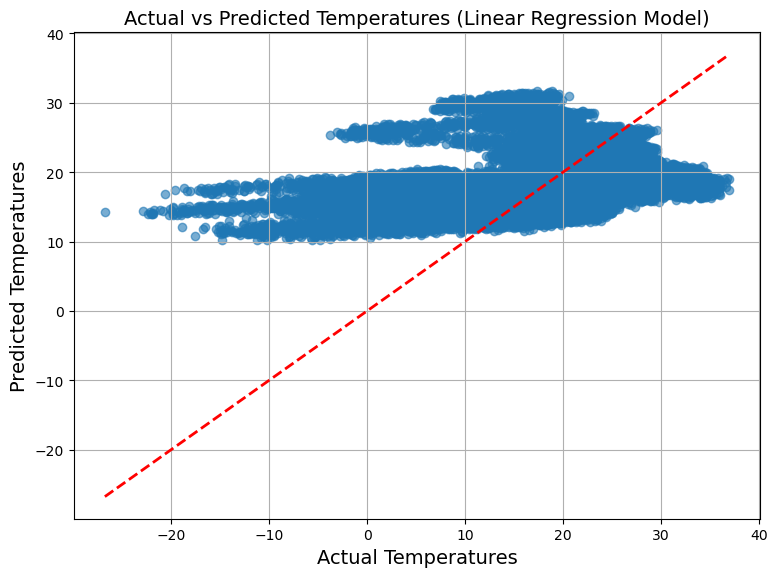

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# Define features and target
X = df[['Year','Month', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/regression_model_M1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Reference line
plt.title("Actual vs Predicted Temperatures (Linear Regression Model)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig("Actual_vs_Predicted_Linear_Regression_M1")
plt.show()

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 7.0842
Mean Squared Error (MSE): 79.7846
Root Mean Squared Error (RMSE): 8.9322


#### Selecting fewer features
We will also train the model with fewer features

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Define features and target
X = df[['Year', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/regression_model_M2.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the Linear Regression model: {result:.4f}")

R² Score of the Linear Regression model: 0.1292


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_Linear_Regression_M2.png


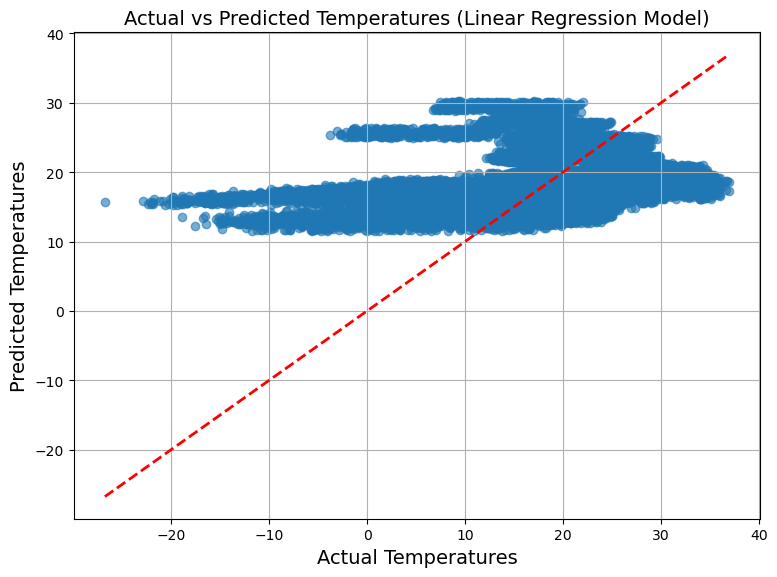

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Define features and target
X = df[['Year', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/regression_model_M2.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Reference line
plt.title("Actual vs Predicted Temperatures (Linear Regression Model)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.grid(True)
save_fig("Actual_vs_Predicted_Linear_Regression_M2")
plt.show()

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 7.1300
Mean Squared Error (MSE): 80.7002
Root Mean Squared Error (RMSE): 8.9833


## Building and Training a Random Forest Model

After testing with a Linear Regression model, we will now explore a more advanced machine learning algorithm: **Random Forest**. This algorithm often performs better for complex, nonlinear datasets. The target variable is still `AverageTemperature`.

### Why Random Forest?
- **Handles Nonlinearity**: Random Forest can model nonlinear relationships that Linear Regression cannot capture effectively.
- **Robust to Overfitting**: By averaging predictions across multiple decision trees, it reduces overfitting, especially when hyperparameters are tuned properly.
- **Feature Importance**: Random Forest provides insights into which features are most influential in making predictions.
- **Flexibility**: It works well with a mix of continuous and categorical data.

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing, use random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Default n_estimators is 100

# Fit the model on the training set
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/random_forest_model_M1.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)  # R² score on the test set
print(f"R² Score of the Random Forest model: {result:.4f}")

R² Score of the Random Forest model: 0.9857


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_Random_Forest_M1.png


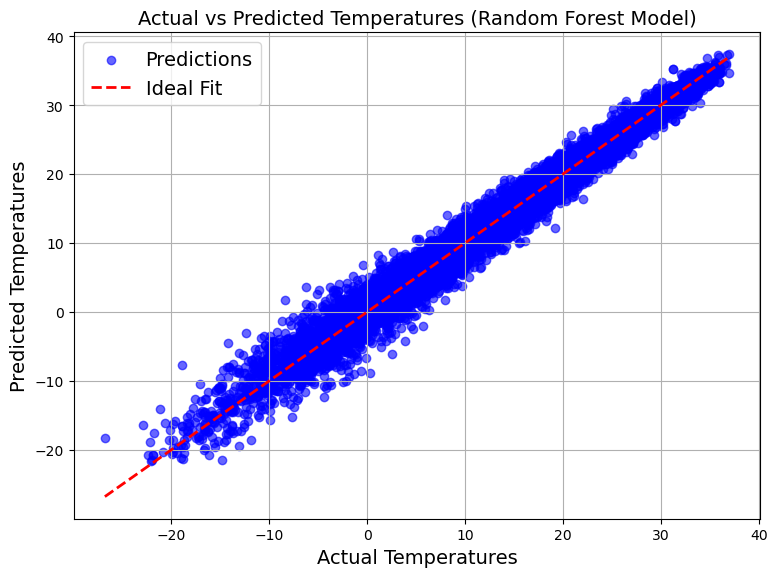

In [172]:
import matplotlib.pyplot as plt

# Define features and target
features = ['Year', 'Latitude', 'Longitude', 'Month']
X = df[features]  # Include all selected features
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/random_forest_model_M1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')  # Reference line
plt.title("Actual vs Predicted Temperatures (Random Forest Model)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.legend()
plt.grid(True)
save_fig("Actual_vs_Predicted_Random_Forest_M1")
plt.show()

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.7750
Mean Squared Error (MSE): 1.3258
Root Mean Squared Error (RMSE): 1.1514


Testing random forest with one hot encoded data

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

# Dynamically select all one-hot encoded Country columns
country_columns = [col for col in df.columns if col.startswith('Country_')]

# Define features and target
features = ['Year', 'Latitude', 'Longitude', 'Month'] + country_columns
X = df[features]  # Include all selected features
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Default n_estimators is 100

# Fit the model on the training set
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/random_forest_model_M2.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)  # R² score on the test set
print(f"R² Score of the Random Forest model: {result:.4f}")

R² Score of the Random Forest model: 0.9857


The model does improve slightly by adding the AverageTemperatureUncertainty, but in a real scenario if we were trying to predict the weather we would not have this information in advance.

In [69]:
# Get feature importance from the model
scores = model.feature_importances_
for name, importance in zip(features, scores):
    print(f"{name}: {importance:.4f}")

Year: 0.0133
Latitude: 0.4797
Longitude: 0.0710
Month: 0.3768
Country_Angola: 0.0000
Country_Australia: 0.0000
Country_Bangladesh: 0.0001
Country_Brazil: 0.0004
Country_Burma: 0.0000
Country_Canada: 0.0010
Country_Chile: 0.0028
Country_China: 0.0456
Country_Colombia: 0.0001
Country_Congo (Democratic Republic Of The): 0.0001
Country_Côte D'Ivoire: 0.0000
Country_Dominican Republic: 0.0000
Country_Egypt: 0.0003
Country_Ethiopia: 0.0000
Country_France: 0.0002
Country_Germany: 0.0003
Country_India: 0.0012
Country_Indonesia: 0.0000
Country_Iran: 0.0001
Country_Iraq: 0.0002
Country_Italy: 0.0001
Country_Japan: 0.0001
Country_Kenya: 0.0000
Country_Mexico: 0.0001
Country_Morocco: 0.0003
Country_Nigeria: 0.0000
Country_Pakistan: 0.0005
Country_Peru: 0.0001
Country_Philippines: 0.0000
Country_Russia: 0.0004
Country_Saudi Arabia: 0.0002
Country_Senegal: 0.0002
Country_Singapore: 0.0000
Country_Somalia: 0.0000
Country_South Africa: 0.0001
Country_South Korea: 0.0010
Country_Spain: 0.0001
Country_S

The country features have little to no value in the model

Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_Random_Forest_M2.png


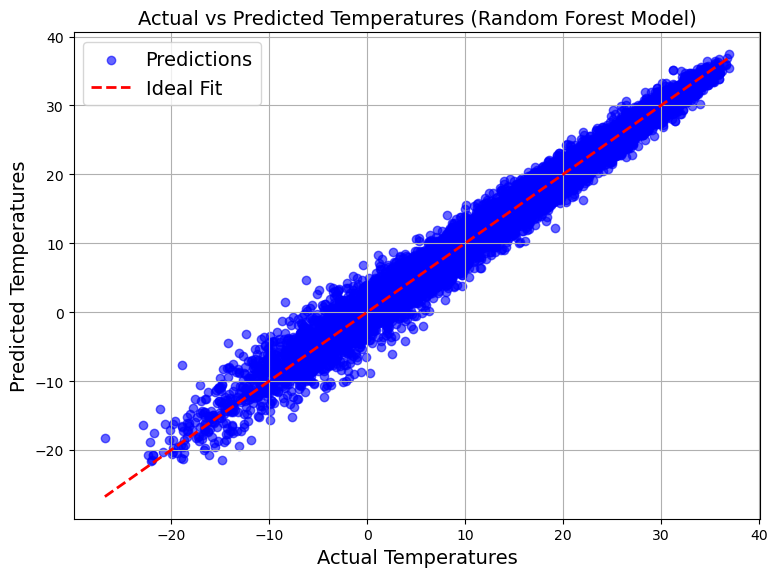

In [173]:
import matplotlib.pyplot as plt

# Dynamically select all one-hot encoded Country columns
country_columns = [col for col in df.columns if col.startswith('Country_')]

# Define features and target
features = ['Year', 'Latitude', 'Longitude', 'Month'] + country_columns
X = df[features]  # Include all selected features
y = df['AverageTemperature']  # Target variable

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/random_forest_model_M2.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')  # Reference line
plt.title("Actual vs Predicted Temperatures (Random Forest Model)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.legend()
plt.grid(True)
save_fig("Actual_vs_Predicted_Random_Forest_M2")
plt.show()

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.7741
Mean Squared Error (MSE): 1.3284
Root Mean Squared Error (RMSE): 1.1526


## Building and Training a Support Vector Regression (SVR) Model

After testing with simpler models like Linear Regression and Random Forest, we will now explore **Support Vector Regression (SVR)**, a robust and flexible algorithm capable of handling both linear and nonlinear relationships. The target variable is still `AverageTemperature`.

### Why Support Vector Regression?
- **Effective for Nonlinear Relationships**: SVR uses kernels (for example rbf, poly and linear) to map data into a higher-dimensional space, allowing it to capture complex patterns.
- **Robust to Outliers**: By introducing a margin of tolerance (`epsilon`), SVR focuses on the most relevant data points (support vectors) and ignores small deviations.
- **Generalization**: SVR aims to strike a balance between model complexity and prediction accuracy, reducing the risk of overfitting.

### Key Considerations
- **Feature Scaling**: SVR is sensitive to feature magnitudes, so scaling features (here with `StandardScaler`) is essential for optimal performance.
- **Training Time**: SVR can be computationally expensive for large datasets due to its quadratic or cubic time complexity, especially with nonlinear kernels.
- **Feature Selection**: Different features sets were tested for each model.

#### Testing rbf kernel

In [71]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to scale data
model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1, degree=3))

# Fit the model
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/SVR_model_M1.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the SVR model: {result:.4f}")

R² Score of the SVR model: 0.9179


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_SVR_M1.png


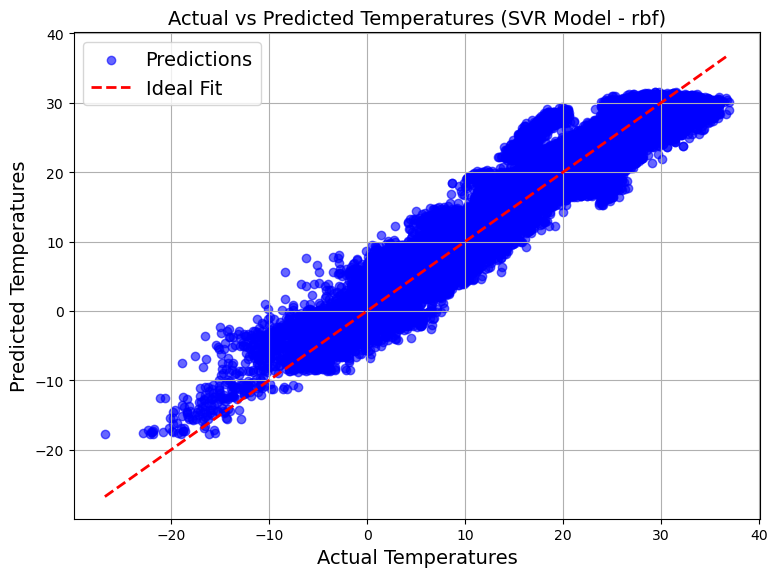

In [174]:
import matplotlib.pyplot as plt

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/SVR_model_M1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')  # Reference line
plt.title("Actual vs Predicted Temperatures (SVR Model - rbf)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.legend()
plt.grid(True)
save_fig("Actual_vs_Predicted_SVR_M1")
plt.show()

In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 2.0081
Mean Squared Error (MSE): 7.6086
Root Mean Squared Error (RMSE): 2.7584


#### Testing poly kernel

In [72]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to scale data
model = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.1, degree=3))

# Fit the model
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/SVR_model_M2.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the SVR model: {result:.4f}")

KeyboardInterrupt: 

Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_SVR_M2.png


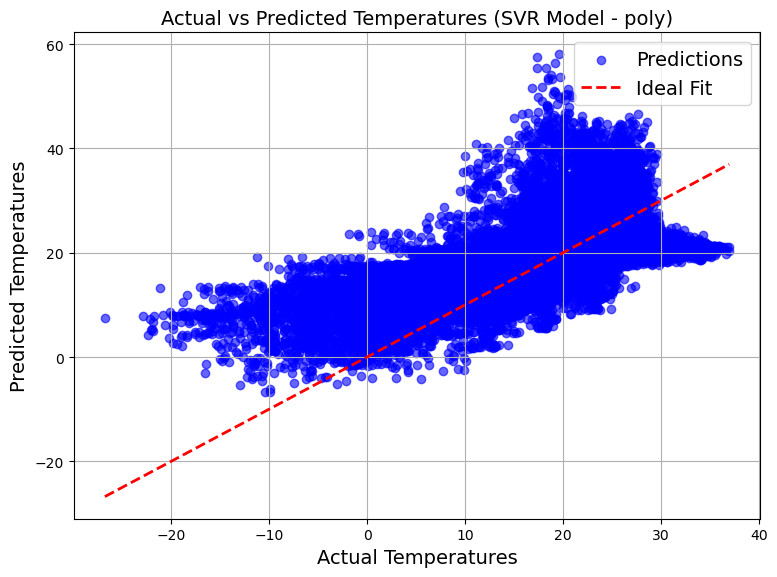

In [175]:
import matplotlib.pyplot as plt

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/SVR_model_M2.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')  # Reference line
plt.title("Actual vs Predicted Temperatures (SVR Model - poly)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.legend()
plt.grid(True)
save_fig("Actual_vs_Predicted_SVR_M2")
plt.show()

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 5.9241
Mean Squared Error (MSE): 58.0018
Root Mean Squared Error (RMSE): 7.6159


#### Testing linear kernel

In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to scale data
model = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1.0, epsilon=0.1, degree=3))

# Fit the model
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/SVR_model_M3.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the SVR (linear kernel) model: {result:.4f}")

R² Score of the SVR (linear kernel) model: 0.0835


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_SVR_M3.png


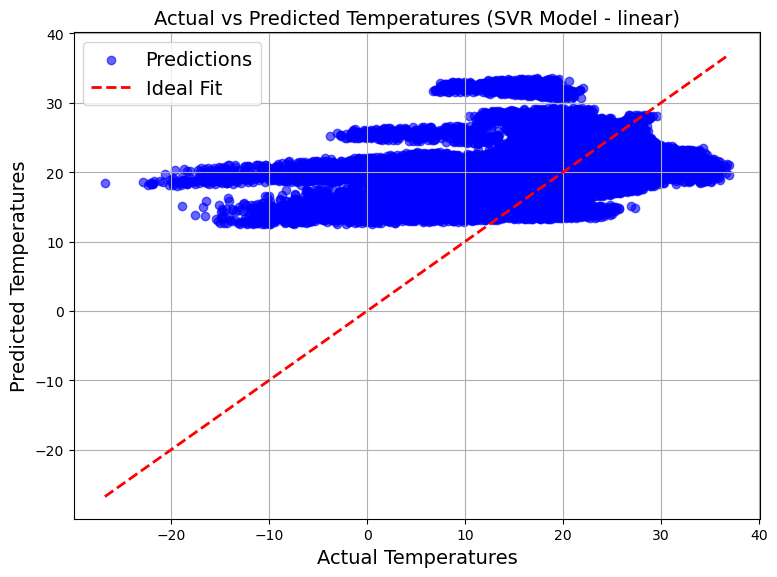

In [176]:
import matplotlib.pyplot as plt

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/SVR_model_M3.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')  # Reference line
plt.title("Actual vs Predicted Temperatures (SVR Model - linear)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.legend()
plt.grid(True)
save_fig("Actual_vs_Predicted_SVR_M3")
plt.show()

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 6.8501
Mean Squared Error (MSE): 84.9333
Root Mean Squared Error (RMSE): 9.2159


#### Testing LinearSVR

In [34]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pickle

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to scale data (LinearSVR is sensitive to feature scales)
model = make_pipeline(StandardScaler(), LinearSVR(C=1.0, epsilon=0.5, dual=True, max_iter=10000, random_state=42))

# Fit the model
model.fit(X_train, y_train)

# Save the model to disk
filename = '../models/LinearSVR_model_M1.sav'
pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate the loaded model on the test set
result = loaded_model.score(X_test, y_test)  # R² score for regression tasks
print(f"R² Score of the LinearSVR model: {result:.4f}")

R² Score of the LinearSVR model: 0.0835


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_LinearSVR_M1.png


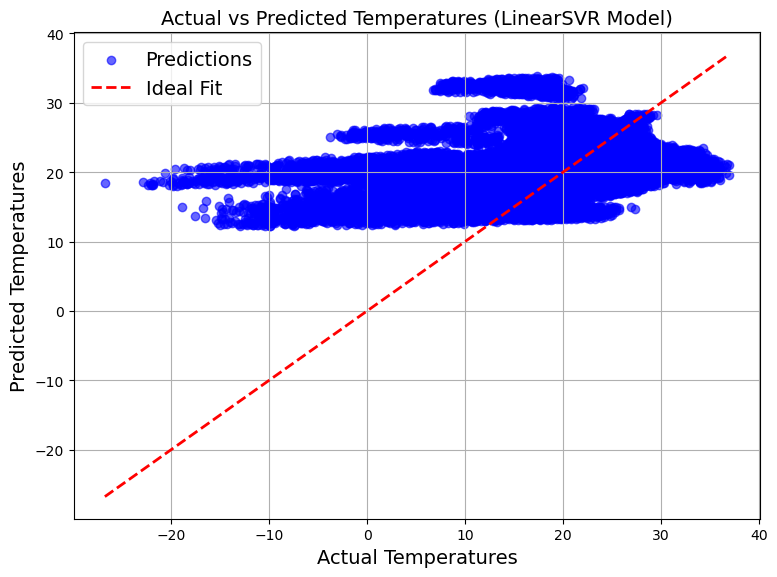

In [177]:
import matplotlib.pyplot as plt

# Define features and target
X = df[['Year', 'Latitude', 'Longitude', 'Month']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/LinearSVR_model_M1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')  # Reference line
plt.title("Actual vs Predicted Temperatures (LinearSVR Model)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.legend()
plt.grid(True)
save_fig("Actual_vs_Predicted_LinearSVR_M1")
plt.show()

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 6.8504
Mean Squared Error (MSE): 84.9363
Root Mean Squared Error (RMSE): 9.2161


## Building and Training a K-Nearest Neighbors (KNN) Model

### Why KNN?
- **Non-parametric and Flexible**: KNN makes no explicit assumption about the underlying data distribution, making it well-suited for capturing patterns in diverse datasets.
- **Simple to Understand and Implement**: KNN is straightforward—it relies on measuring the distance between data points and uses the average of the `k` nearest neighbors to predict the target variable.
- **Adaptability to Data Complexity**: By tuning the number of neighbors (`k`), KNN can balance between underfitting (low `k`) and overfitting (high `k`) for better generalization.
- **Effective for Local Patterns**: KNN excels at identifying local trends in the data, making it particularly useful for problems where relationships vary across regions of the input space.

### Key Considerations
- **Computational Efficiency**: KNN can be computationally expensive for large datasets as it needs to compute distances to all points in the training set during predictions.


In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

# Define features and target
X = df[['Year', 'Month', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scikitlearn_knn = KNeighborsRegressor(n_neighbors=5)
scikitlearn_knn.fit(X_train, y_train)
y_pred = scikitlearn_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("knn mean squared error: ", mse)

# Save the model to disk
filename = '../models/KNN_model_M1.sav'
pickle.dump(scikitlearn_knn, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the KNN model: {result:.4f}")

knn mean squared error:  2.7303346931541275
R² Score of the KNN model: 0.9705


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_KNN_M1.png


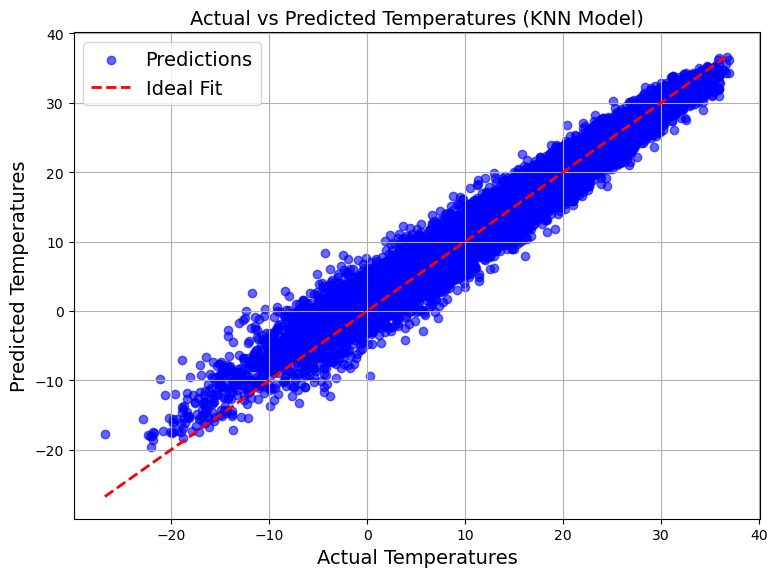

In [181]:
import matplotlib.pyplot as plt

# Define features and target
X = df[['Year', 'Month', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/KNN_model_M1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')  # Reference line
plt.title("Actual vs Predicted Temperatures (KNN Model)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.legend()
plt.grid(True)
save_fig("Actual_vs_Predicted_KNN_M1")
plt.show()

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 1.1471
Mean Squared Error (MSE): 2.7303
Root Mean Squared Error (RMSE): 1.6524


#### Testing with fewer features

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

# Define features and target
X = df[['Year', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scikitlearn_knn = KNeighborsRegressor(n_neighbors=5)
scikitlearn_knn.fit(X_train, y_train)
y_pred = scikitlearn_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("knn mean squared error: ", mse)

# Save the model to disk
filename = '../models/KNN_model_M2.sav'
pickle.dump(scikitlearn_knn, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Evaluate on the test set
result = loaded_model.score(X_test, y_test)
print(f"R² Score of the KNN model: {result:.4f}")

knn mean squared error:  52.9440752986729
R² Score of the KNN model: 0.4287


Visualizing the results

Saving figure to ../reports/figures/Actual_vs_Predicted_KNN_M2.png


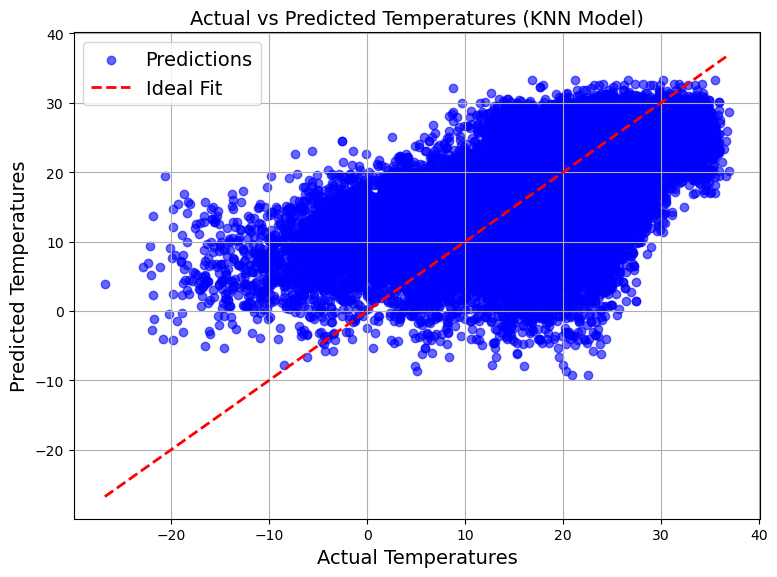

In [179]:
import matplotlib.pyplot as plt

# Define features and target
X = df[['Year', 'Latitude', 'Longitude']]
y = df['AverageTemperature']  # Target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model from disk
filename = '../models/KNN_model_M2.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the test set
y_pred = loaded_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')  # Reference line
plt.title("Actual vs Predicted Temperatures (KNN Model)")
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.legend()
plt.grid(True)
save_fig("Actual_vs_Predicted_KNN_M2")
plt.show()

In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 5.2274
Mean Squared Error (MSE): 52.9441
Root Mean Squared Error (RMSE): 7.2763
